In [38]:
#import dependencies
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
#api request from the eia

api_key = "5WecopwolfmCM4zg4P5Bm9ZVaRYIMFEjVa9KQZaT"

#from colorado, years 2016-2021
base_url = f'https://api.eia.gov/v2/seds/data/?api_key={api_key}&frequency=annual&data[0]=value&facets[stateId][]=CO&start=2016&end=2021&offset=0&length=5000'


# Send the HTTP GET request to the API and retrieve the response
response = requests.get(base_url).json()

#print results of the api request
print(json.dumps(response, indent = 4, sort_keys=True))




{
    "apiVersion": "2.1.4",
    "request": {
        "command": "/v2/seds/data/",
        "params": {
            "api_key": "5WecopwolfmCM4zg4P5Bm9ZVaRYIMFEjVa9KQZaT",
            "data": [
                "value"
            ],
            "end": 2021,
            "facets": {
                "stateId": [
                    "CO"
                ]
            },
            "frequency": "annual",
            "length": 5000,
            "offset": 0,
            "start": 2016
        }
    },
    "response": {
        "data": [
            {
                "period": 2017,
                "seriesDescription": "Heating degree days",
                "seriesId": "ZWHDP",
                "stateDescription": "Colorado",
                "stateId": "CO",
                "unit": "Days",
                "value": 6480
            },
            {
                "period": 2020,
                "seriesDescription": "Primary energy total expenditures in the industrial sector",
                "ser

In [40]:
#lists to store the desired values
energy_type = []
period = []
value = []
unit = []

In [41]:
#populate the lists
for item in range(len(response['response']['data'])):
    energy_type.append(response['response']['data'][item]['seriesDescription'])
    period.append(response['response']['data'][item]['period'])
    value.append(response['response']['data'][item]['value'])
    unit.append(response['response']['data'][item]['unit'])
   

In [42]:
#create dataframe from these lists
energy = {
    'Period':period,
    'Energy Type': energy_type,
    'Value':value,
    'Unit': unit
    
}

energy_df = pd.DataFrame(energy)


In [43]:
#df sorted by year
energy_df = energy_df.sort_values(by='Period', ascending=True)
energy_df = energy_df.reset_index(drop=True)
energy_df

,Period,Energy Type,Value,Unit
0,2016,Propane consumed by the commercial sector,647.000,Thousand barrels
1,2016,"Coal average price, all end-use sectors",3.030,Dollars per million Btu
2,2016,Factor for converting coal consumed by the res...,23.848,Million Btu per short ton
3,2016,Coal total expenditures,601.400,Million dollars
4,2016,Coal consumed at coke plants (coking coal),0.000,Billion Btu
...,...,...,...,...
3849,2021,Lubricants consumed by the transportation sector,286.000,Thousand barrels
3850,2021,Lubricants total consumption,702.000,Thousand barrels
3851,2021,Lubricants consumed by the transportation sector,1735.000,Billion Btu
3852,2021,Aviation gasoline total end-use consumption,547.000,Billion Btu


In [44]:
#a list to show all the units we are working with: total of 21
types_of_units = energy_df['Unit'].unique()
types_of_units

array(['Thousand barrels', 'Dollars per million Btu',
       'Million Btu per short ton', 'Million dollars', 'Billion Btu',
       'Thousand short tons', 'Million kilowatthours',
       'Million cubic feet', 'Million Btu', 'Thousand Btu per cubic foot',
       'Million Btu per barrel', 'Million chained (2012) dollars',
       'Thousand Btu per chained (2012) dollar',
       'Thousand Btu per cubic feet', 'Days', 'Dollars', 'Thousand',
       'Barrels', 'Kilowatthours', 'Thousand cubic feet', 'Percent'],
      dtype=object)

In [64]:
#new df sorted by the units column to group units together
units_df = energy_df.sort_values(by='Unit')
units_df.reset_index(drop=True).head(100)


,Period,Energy Type,Value,Unit
0,2016,All petroleum products total consumption per c...,17.3,Barrels
1,2019,All petroleum products total consumption per c...,18.1,Barrels
2,2018,All petroleum products total consumption per c...,17.7,Barrels
3,2020,All petroleum products total consumption per c...,15.0,Barrels
4,2017,All petroleum products total consumption per c...,17.3,Barrels
...,...,...,...,...
95,2018,Distillate fuel oil consumed by the industrial...,31896.0,Billion Btu
96,2018,Residual fuel oil consumed by the transportati...,0.0,Billion Btu
97,2018,Asphalt and road oil total end-use consumption,16076.0,Billion Btu
98,2018,Hydrocarbon gas liquids consumed by the commer...,2665.0,Billion Btu


,Period,Energy Type,Value,Unit
581,2016,All petroleum products total consumption per c...,17.3,Barrels
2470,2019,All petroleum products total consumption per c...,18.1,Barrels
1529,2018,All petroleum products total consumption per c...,17.7,Barrels
2977,2020,All petroleum products total consumption per c...,15.0,Barrels
1191,2017,All petroleum products total consumption per c...,17.3,Barrels
...,...,...,...,...
3484,2021,Coal consumed by industrial users other than c...,144.0,Thousand short tons
1629,2018,Coal consumed by the commercial sector,0.0,Thousand short tons
1640,2018,Coal consumed by the electric power sector,15266.0,Thousand short tons
1076,2017,Coal consumed by the transportation sector,0.0,Thousand short tons


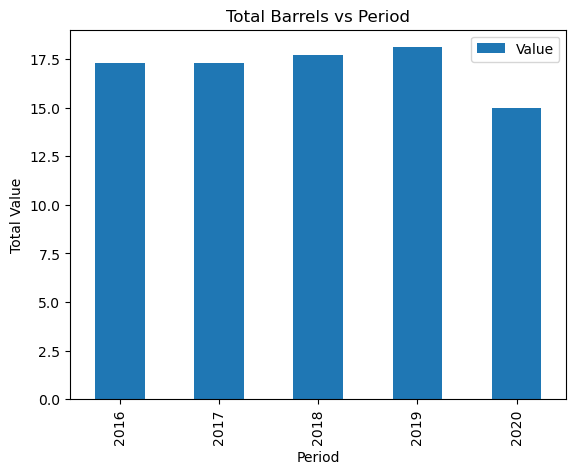

In [56]:
#create a bar graph of the total amount of 'barrels' used each year

#sort df by year 
units_df = energy_df.sort_values(by=['Unit', 'Period'], ascending=True)

#get the sum per year
barrels_df = units_df[units_df['Unit'] == 'Barrels'].groupby('Period')['Value'].sum().reset_index()
barrels_df.plot(x='Period', y='Value', kind='bar')

plt.xlabel('Period')
plt.ylabel('Total Value')
plt.title('Total Barrels vs Period')

plt.show()

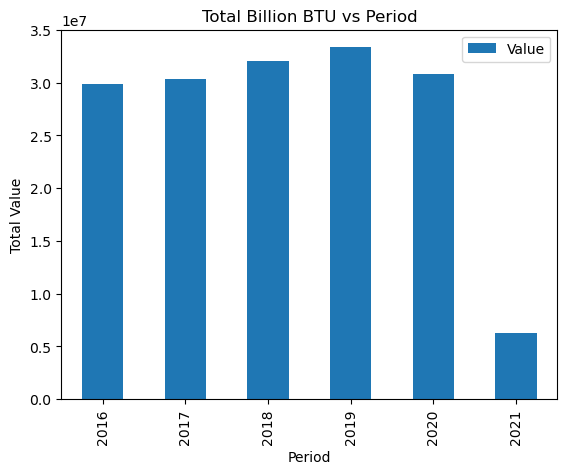

In [66]:
#get the sum per year
barrels_df = units_df[units_df['Unit'] == 'Billion Btu'].groupby('Period')['Value'].sum().reset_index()
barrels_df.plot(x='Period', y='Value', kind='bar')

plt.xlabel('Period')
plt.ylabel('Total Value')
plt.title('Total Billion BTU vs Period')

plt.show()